In [1]:
from torchvision import datasets, transforms

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)

In [2]:
import sys
import os
sys.path.insert(1, os.path.join(os.getcwd(), '..'))


In [3]:
import matplotlib.pyplot as plt
import math 
import numpy as np
import pytarbs.functions as f
from pytarbs.feed_forward.model import *
from pytarbs.feed_forward.layer import *
#42 is the meaning of the life
np.random.seed(42)

def hot(x,l):
    r=[0]*l
    r[x]=1
    return np.array(r)

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)


C:\Users\heymannn\Desktop\components\ml\ml-from-scratch\tests\..


In [4]:
model=FeedForward()\
    .add_layer(InputLayer(28*28))\
    .add_layer(DenseLayer(28*28,16,f.LeakyRelu()))\
    .add_layer(DenseLayer(16,16,f.LeakyRelu()))\
    .add_layer(OutputLayer(16, 10, None))


In [5]:
def predict(x):
    preds=softmax(model.forward(x)[0])
    return np.argmax(preds)

In [6]:
def train():
    for i in range(60000):
        pred=model.forward([dataset1[i][0].flatten().numpy()])
        act= hot(dataset1[i][1],10)
        loss=f.SoftMaxLoss().d(pred[0], act)
        model.backward(loss)
        model.update(lr=0.003)


In [7]:
#two epochs
train()
train()

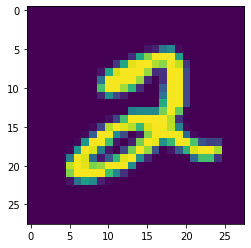

In [8]:
from matplotlib import pyplot as plt

plt.imshow(dataset1[5][0].view(28,28))

In [9]:
dataset1[0][0].flatten().shape

torch.Size([784])

[6.19094184e-09 1.50223681e-09 2.83474400e-06 3.76937250e-07
 9.96276203e-01 3.50057447e-07 3.10474272e-06 5.00080998e-07
 1.29963816e-05 3.70362631e-03]
4
4


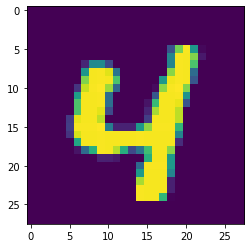

In [10]:
den=248
print(softmax(model.forward([dataset2[den][0].flatten().numpy()])[0]))
print(predict(dataset2[den][0].flatten().numpy()))

plt.imshow(dataset2[den][0].view(28,28))
print(dataset2[den][1])


In [11]:
t=0
fa=0
for i in range(1000):
    asd=predict(dataset2[i][0].flatten().numpy())
    if asd==dataset2[i][1]: t+=1
    else:
        fa+=1
        
print(100*t/(t+fa))

85.8
